In [91]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot

In [92]:
cars_data=pd.read_csv("cars_sampled.csv")
cars=cars_data.copy()

In [93]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50001 non-null  object
 1   name                 50001 non-null  object
 2   seller               50001 non-null  object
 3   offerType            50001 non-null  object
 4   price                50001 non-null  int64 
 5   abtest               50001 non-null  object
 6   vehicleType          44813 non-null  object
 7   yearOfRegistration   50001 non-null  int64 
 8   gearbox              47177 non-null  object
 9   powerPS              50001 non-null  int64 
 10  model                47243 non-null  object
 11  kilometer            50001 non-null  int64 
 12  monthOfRegistration  50001 non-null  int64 
 13  fuelType             45498 non-null  object
 14  brand                50001 non-null  object
 15  notRepairedDamage    40285 non-null  object
 16  date

In [94]:
pd.set_option('display.float_format',lambda x:'%.3f' % x)
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,50001.000,50001.000,50001.000,50001.000,50001.000,50001.000
mean,6559.865,2005.544,116.496,125613.688,5.744,50775.217
std,85818.470,122.992,230.568,40205.234,3.711,25743.702
min,0.000,1000.000,0.000,5000.000,0.000,1067.000
25%,1150.000,1999.000,69.000,125000.000,3.000,30559.000
50%,2950.000,2003.000,105.000,150000.000,6.000,49504.000
75%,7190.000,2008.000,150.000,150000.000,9.000,71404.000
max,12345678.000,9999.000,19312.000,150000.000,12.000,99998.000


In [95]:
cars.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'postalCode', 'lastSeen'],
      dtype='object')

In [96]:
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,50001.000,50001.000,50001.000,50001.000,50001.000,50001.000
mean,6559.865,2005.544,116.496,125613.688,5.744,50775.217
std,85818.470,122.992,230.568,40205.234,3.711,25743.702
min,0.000,1000.000,0.000,5000.000,0.000,1067.000
25%,1150.000,1999.000,69.000,125000.000,3.000,30559.000
50%,2950.000,2003.000,105.000,150000.000,6.000,49504.000
75%,7190.000,2008.000,150.000,150000.000,9.000,71404.000
max,12345678.000,9999.000,19312.000,150000.000,12.000,99998.000


In [97]:
#setting dimensions for all our plot
sns.set(rc={'figure.figsize':(12,9)})


In [98]:
cars=cars.drop(columns=['name','dateCrawled','dateCreated','postalCode','lastSeen'],axis=1)
# cars.nunique(axis=0)

In [99]:
cars.isnull().sum()

seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5188
yearOfRegistration        0
gearbox                2824
powerPS                   0
model                  2758
kilometer                 0
monthOfRegistration       0
fuelType               4503
brand                     0
notRepairedDamage      9716
dtype: int64

In [100]:
#removing duplicate records
cars.drop_duplicates(keep='first',inplace=True)

In [101]:
# sns.regplot(x='yearOfRegistration',y='price',scatter=True,fit_reg=False,data=cars,label=any)

In [102]:
#Since the range of col like price have some extreme outliers which is affecting the result .So i decided to make the values of various column within the 
# required range
cars.isnull().sum()

seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5152
yearOfRegistration        0
gearbox                2765
powerPS                   0
model                  2730
kilometer                 0
monthOfRegistration       0
fuelType               4467
brand                     0
notRepairedDamage      9640
dtype: int64

<AxesSubplot: xlabel='yearOfRegistration', ylabel='price'>

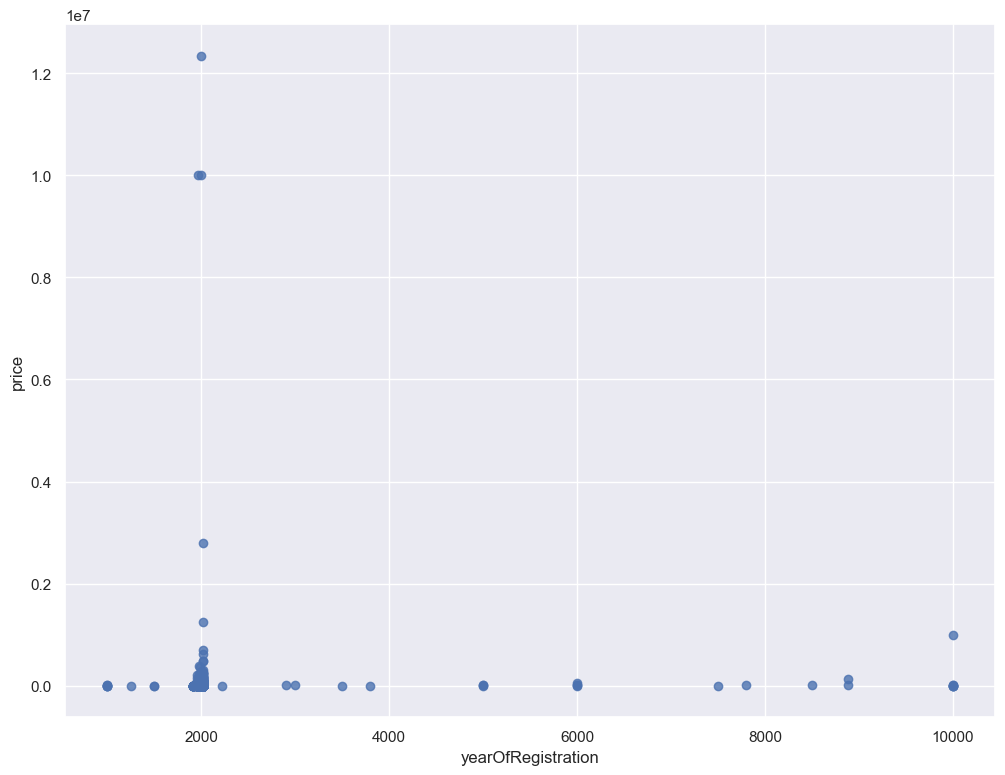

In [103]:
#checking year of registratio we found that are very high
#and these values smears the effect on price 
cars['yearOfRegistration'].value_counts().sort_index()
sns.regplot(x='yearOfRegistration',y='price',scatter=True,fit_reg=False,data=cars)

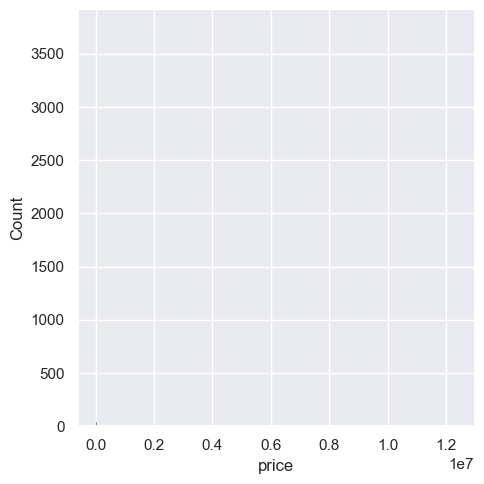

In [104]:
#now checking price variable and we also need to check it out as 
#some price is 0 which smears he effect on price model
cars['price'].value_counts().sort_index()
sns.displot(cars['price'])

<AxesSubplot: ylabel='price'>

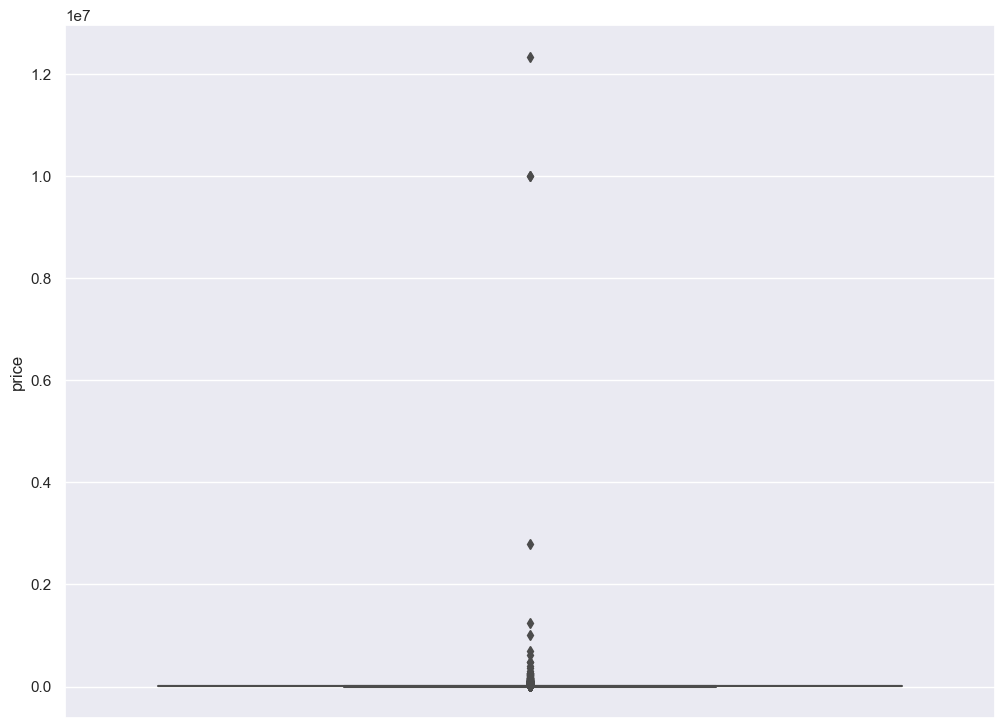

In [105]:
sns.boxplot(y=cars['price'])
#cant een see the box means the data is skewed by ouliers
# having adverse effect o this columns

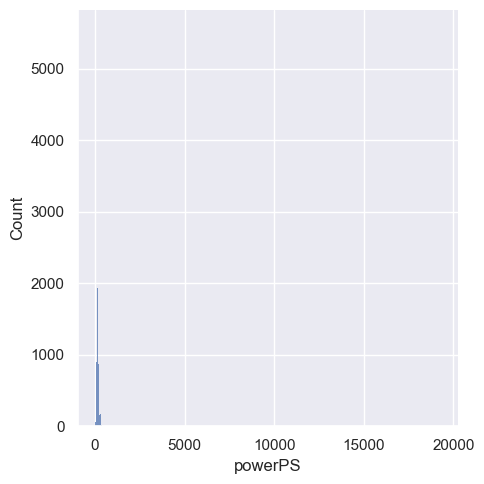

In [106]:
#lets analyse powerps variable using distplot to check for any skewness
sns.displot(cars['powerPS'])
#yes there is as seen becuse of entries that are 0

In [107]:
cars['price'].describe()

count      49531.000
mean        6567.220
std        86222.378
min            0.000
25%         1150.000
50%         2950.000
75%         7100.000
max     12345678.000
Name: price, dtype: float64

In [108]:
#now this range comes from trial and error and also the idea to let not many recrds to go off
cars=cars[(cars.yearOfRegistration<=2023) & (cars.yearOfRegistration>=1950) & (cars.price>=100) & (cars.price<150000) & (cars.powerPS >=10) & (cars.powerPS<=500)]
# Also working range of power ps is 10 to 500 which is known from some searches and reasearch online
cars['monthOfRegistration']/=12
cars['Age']=(2023-cars['yearOfRegistration'])+cars['monthOfRegistration']
cars['Age']=round(cars['Age'],2)
cars['Age'].describe()

count   42772.000
mean       19.873
std         7.093
min         5.000
25%        15.330
50%        19.830
75%        24.170
max        72.750
Name: Age, dtype: float64

In [109]:
# cars.head(5)
cars=cars.drop(columns='yearOfRegistration',axis=1)
cars=cars.drop(columns='monthOfRegistration',axis=1)
# cars.head(2)

<AxesSubplot: xlabel='Age', ylabel='price'>

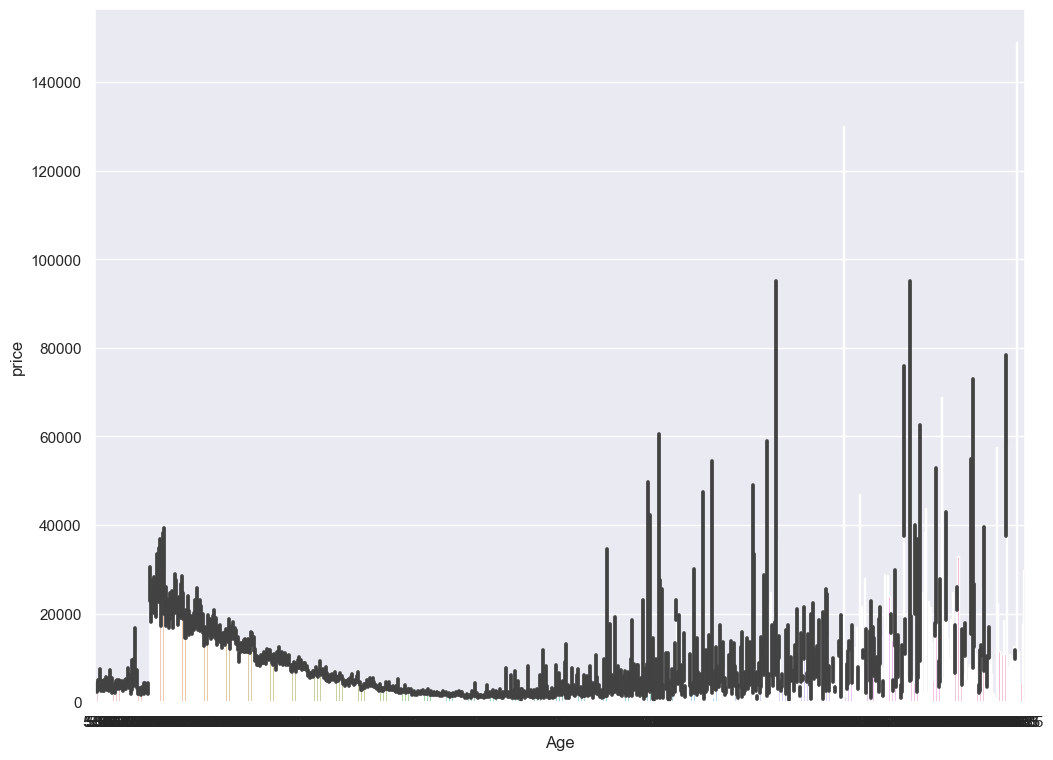

In [110]:
sns.barplot(x=cars['Age'],y=cars['price'])

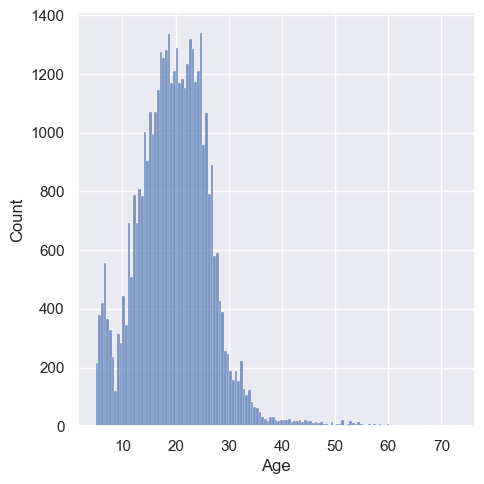

In [111]:
sns.displot(cars['Age'])

<AxesSubplot: >

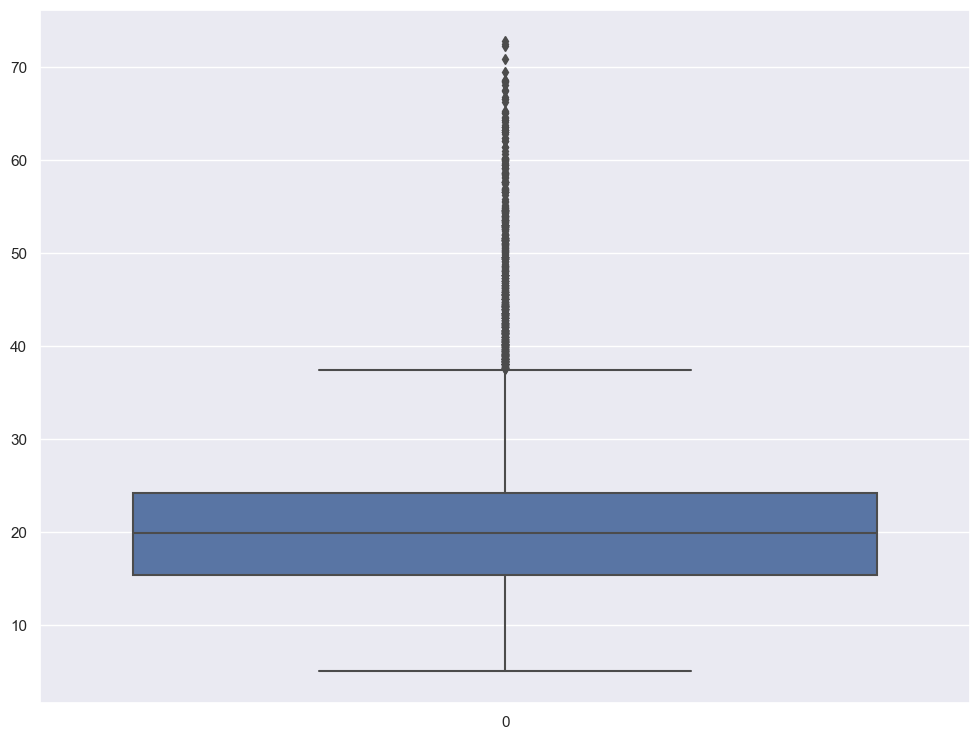

In [112]:
sns.boxplot(cars['Age'])

<AxesSubplot: >

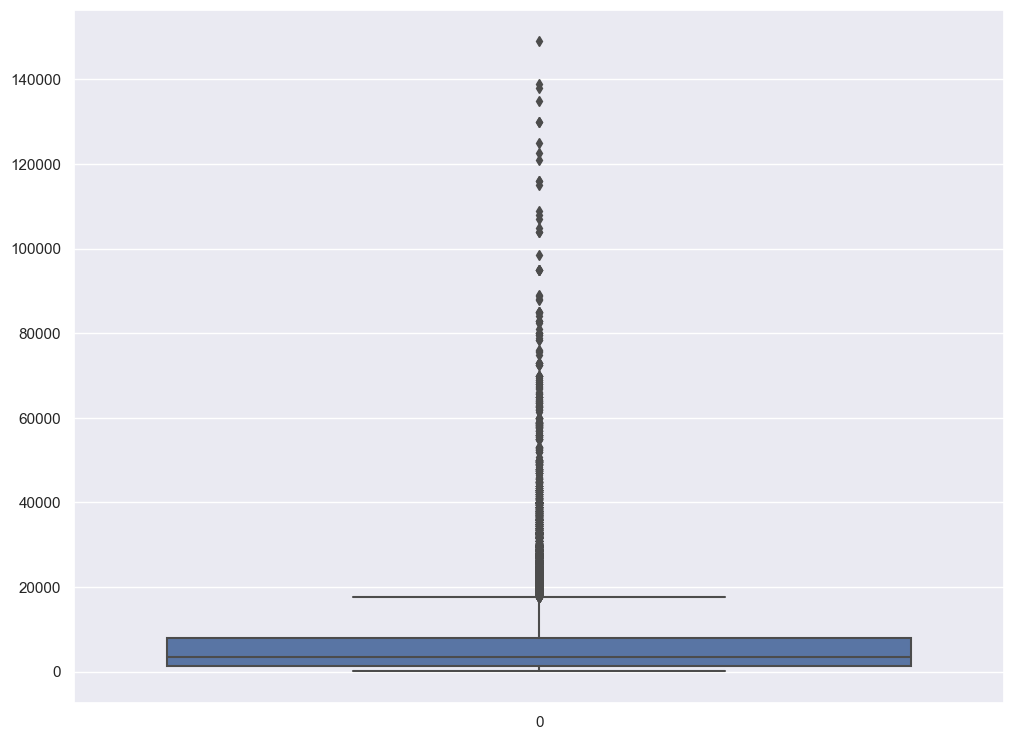

In [113]:
sns.boxplot(cars['price'])

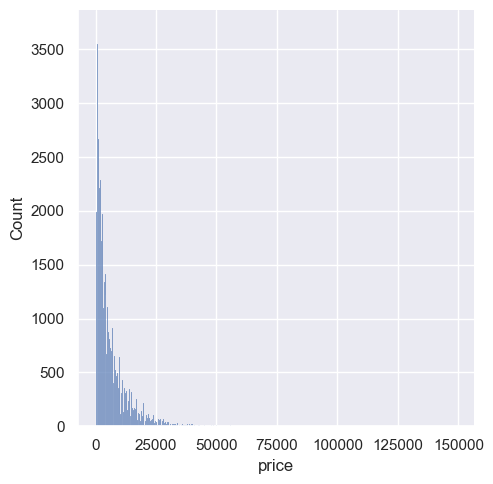

In [114]:
sns.displot(cars['price'])


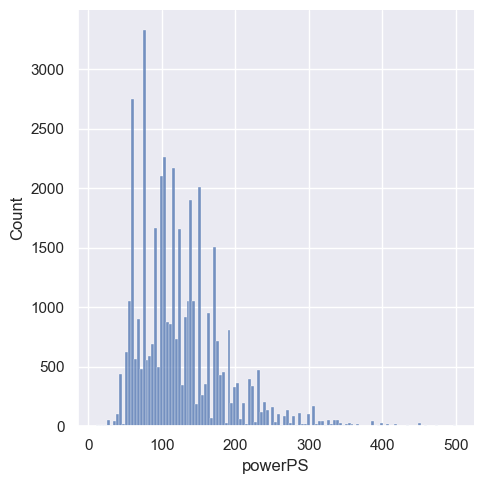

In [115]:
print(sns.displot(cars['powerPS']))


AxesSubplot(0.125,0.11;0.775x0.77)


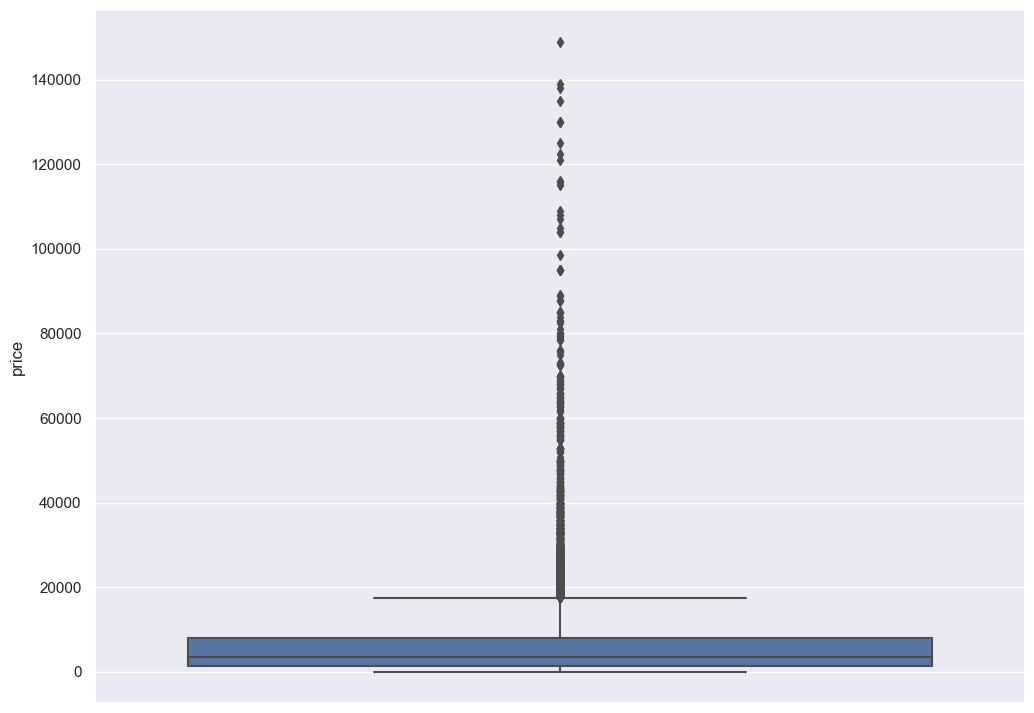

In [116]:
print(sns.boxplot(y=cars['price']))

<AxesSubplot: xlabel='Age', ylabel='price'>

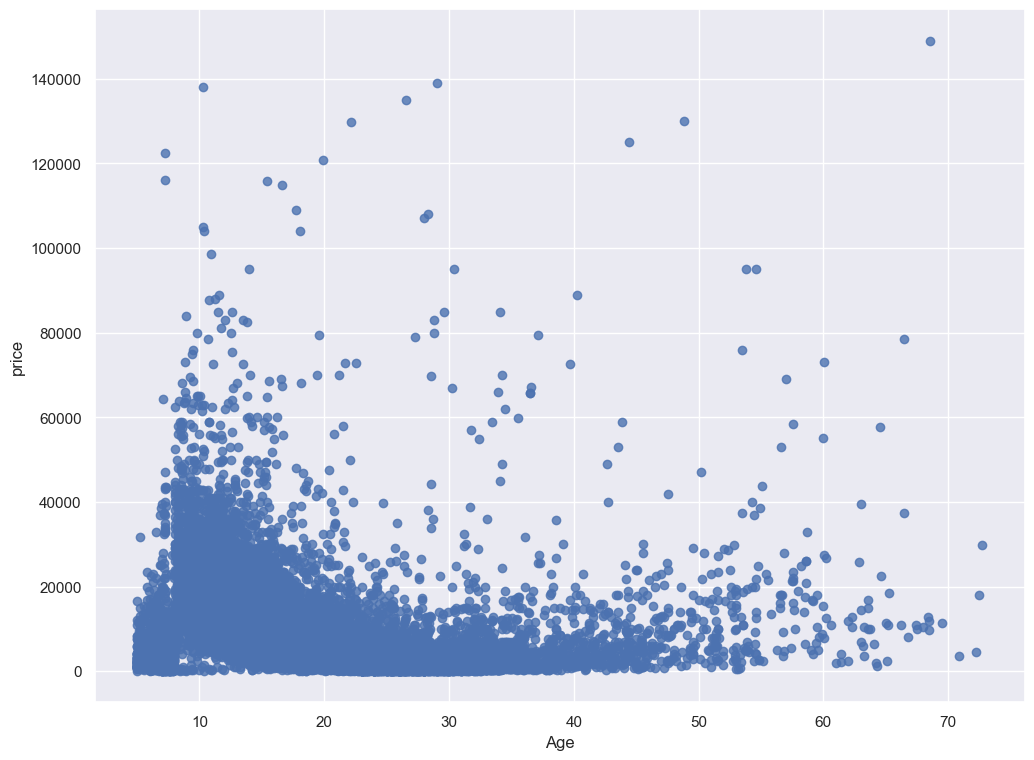

In [117]:
#checking these variables effect on price
sns.regplot(x='Age',y='price', scatter=True,fit_reg=False,data=cars)

<AxesSubplot: xlabel='powerPS', ylabel='price'>

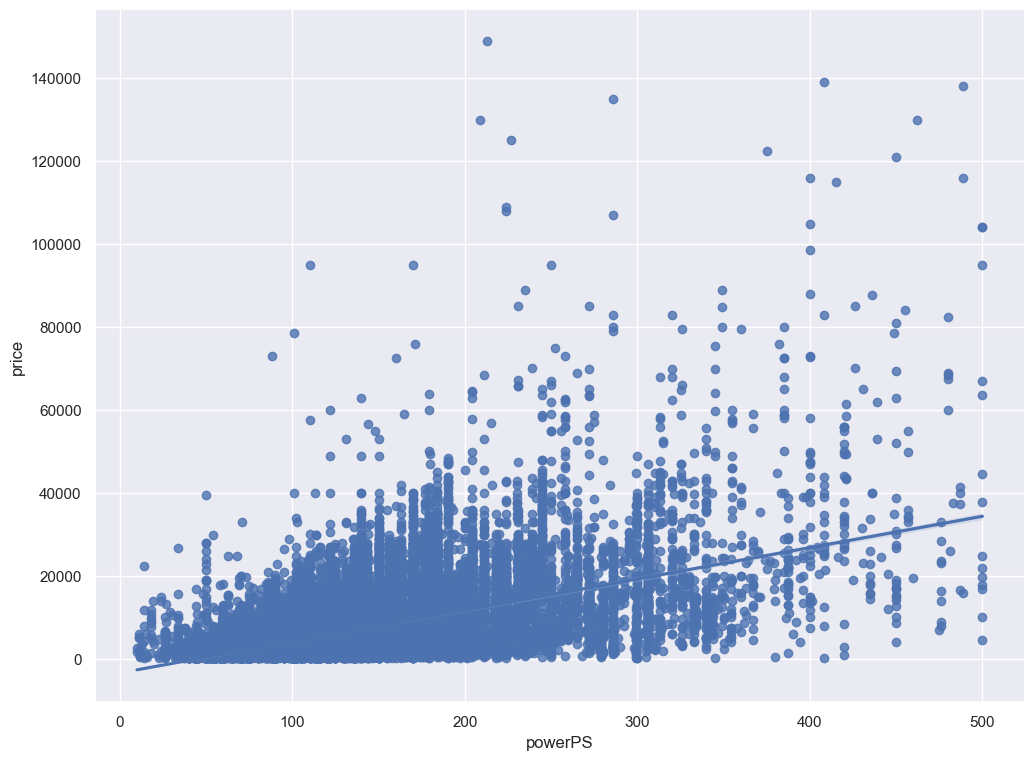

In [118]:
sns.regplot(x=cars['powerPS'],y=cars['price'],scatter=True)

In [119]:
cars.columns

Index(['seller', 'offerType', 'price', 'abtest', 'vehicleType', 'gearbox',
       'powerPS', 'model', 'kilometer', 'fuelType', 'brand',
       'notRepairedDamage', 'Age'],
      dtype='object')

In [120]:
cars['seller'].value_counts()#insinificant
cars['abtest'].value_counts()
cars['vehicleType'].value_counts()
cars['gearbox'].value_counts()
cars['fuelType'].value_counts()
cars['notRepairedDamage'].value_counts()
cars['offerType'].value_counts()#insignificant




offer    42772
Name: offerType, dtype: int64

<AxesSubplot: xlabel='abtest', ylabel='price'>

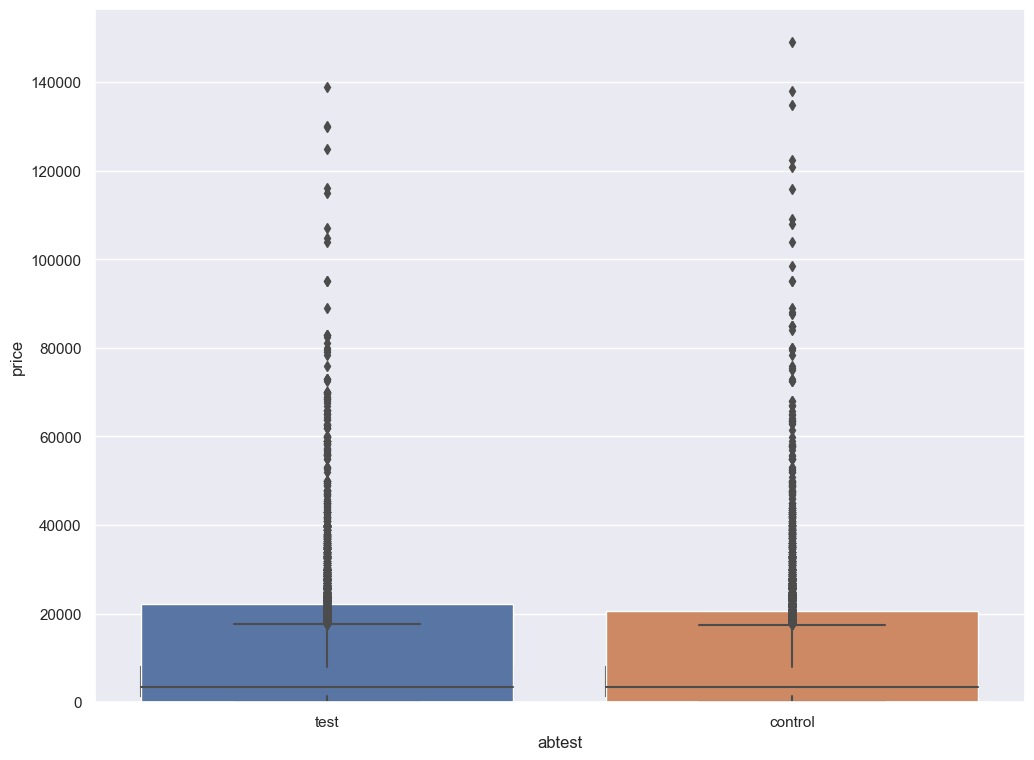

In [121]:
sns.countplot(x=cars['abtest'])
sns.boxplot(x='abtest',y='price',data=cars)
#insignificant as for every price valu  e there is about 50 -50 chances 
#so we can say it will not effect the price much we can drop it hence insignificant

<AxesSubplot: xlabel='vehicleType', ylabel='count'>

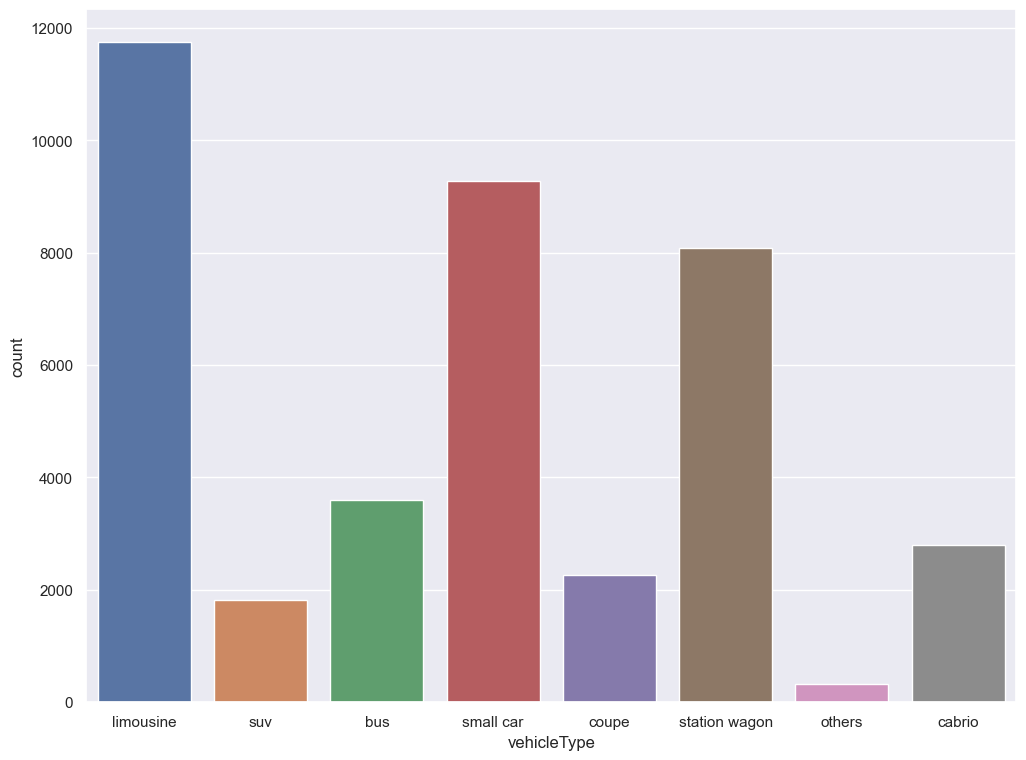

In [122]:
sns.countplot(x='vehicleType',data=cars)

<AxesSubplot: xlabel='fuelType', ylabel='price'>

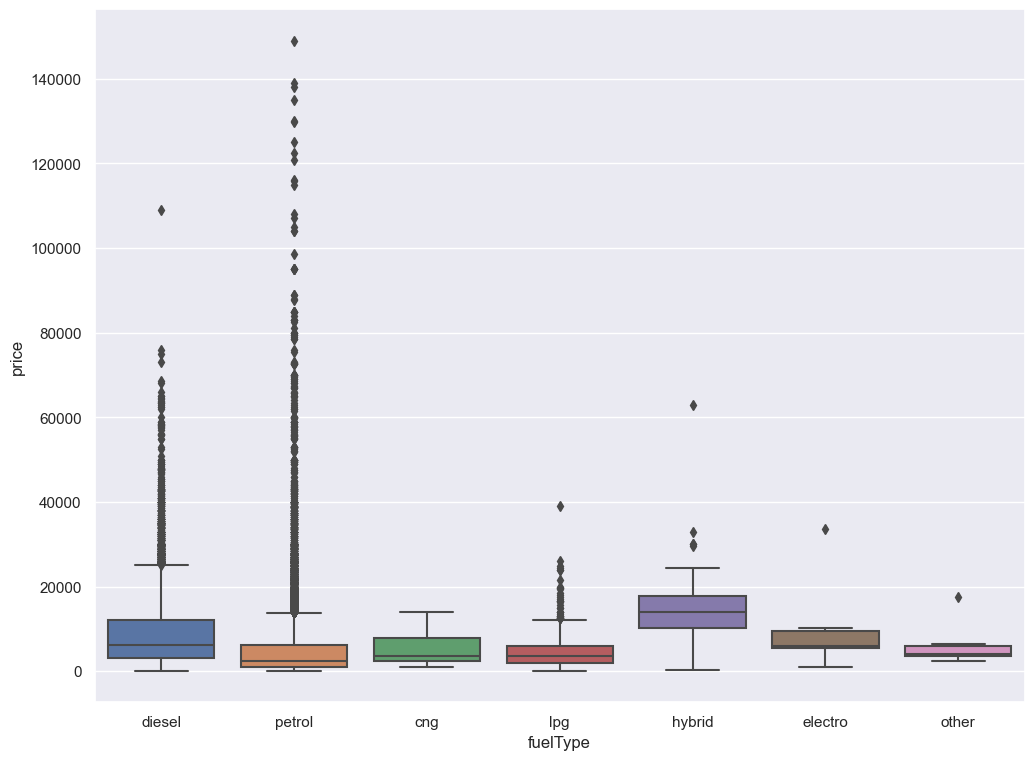

In [123]:
sns.boxplot(y='price',x='fuelType',data=cars)

<AxesSubplot: xlabel='gearbox', ylabel='price'>

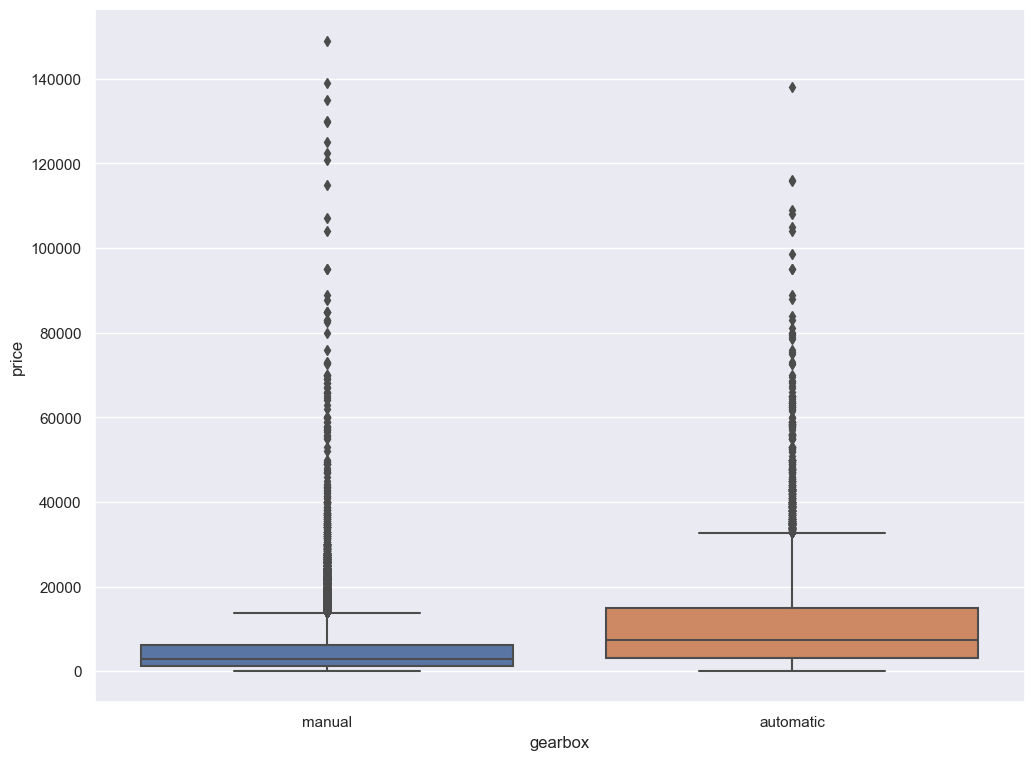

In [124]:
#from box plot lets see gear box have effect on price 
sns.boxplot(x='gearbox',y='price',data=cars)

<AxesSubplot: xlabel='kilometer', ylabel='price'>

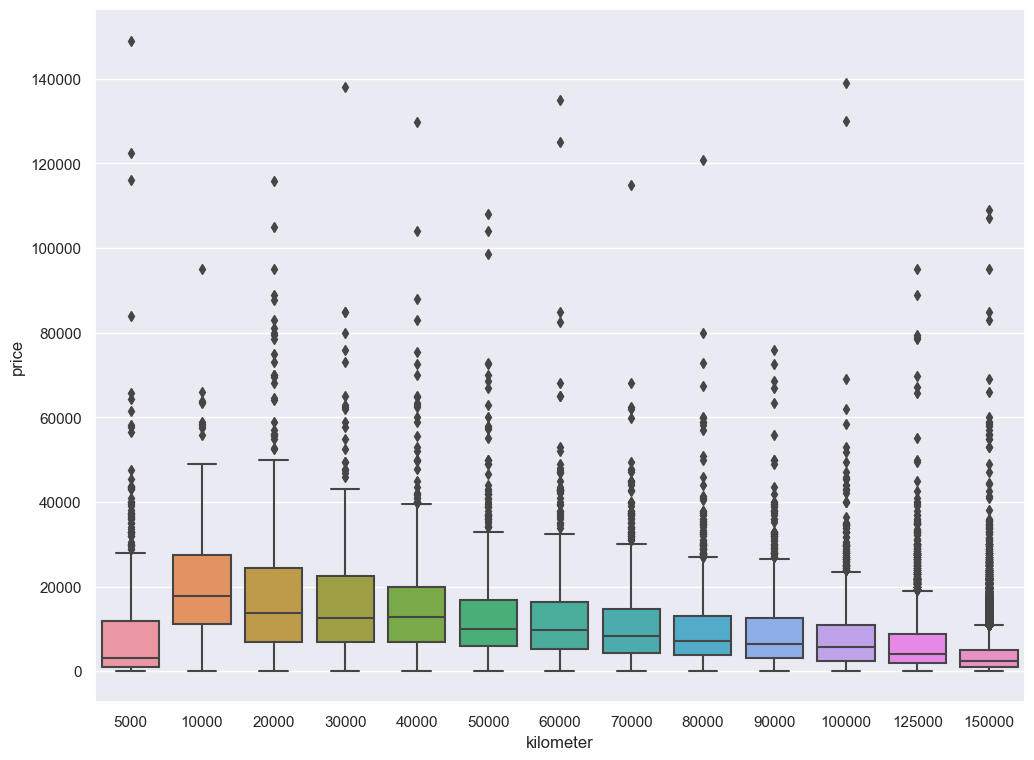

In [125]:
sns.boxplot(x='kilometer',y='price',data=cars)

<AxesSubplot: xlabel='notRepairedDamage', ylabel='price'>

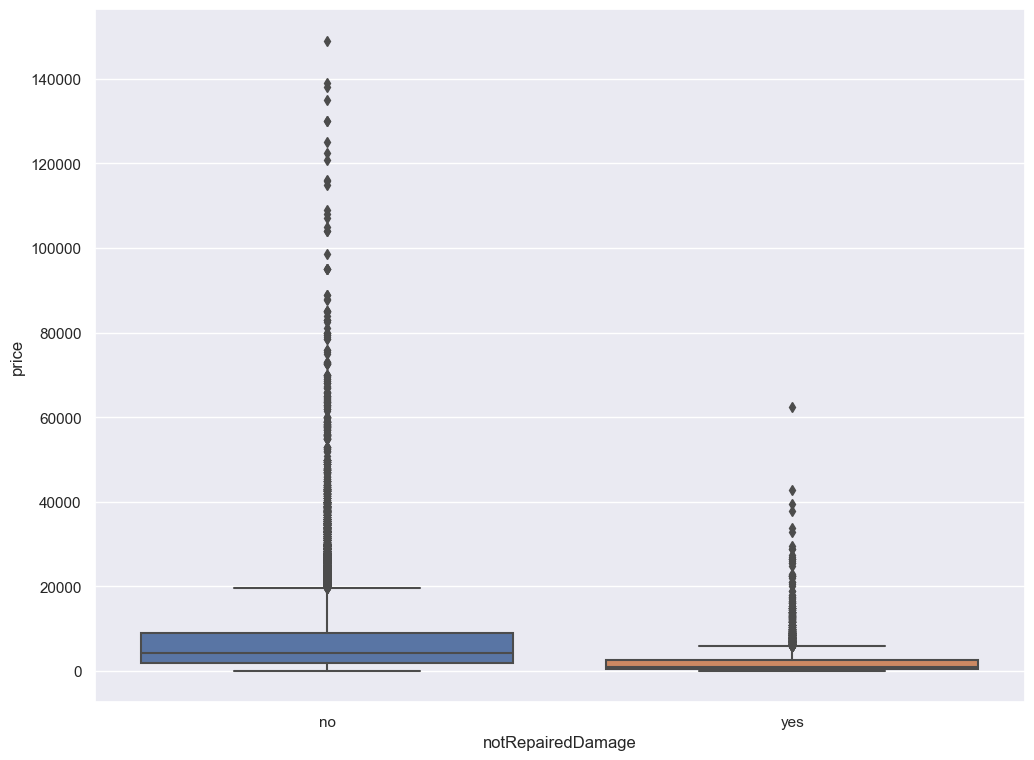

In [126]:
#cars whose damage are not rectified have les prie as seen
sns.boxplot(x='notRepairedDamage',y='price',data=cars)

<AxesSubplot: xlabel='brand', ylabel='count'>

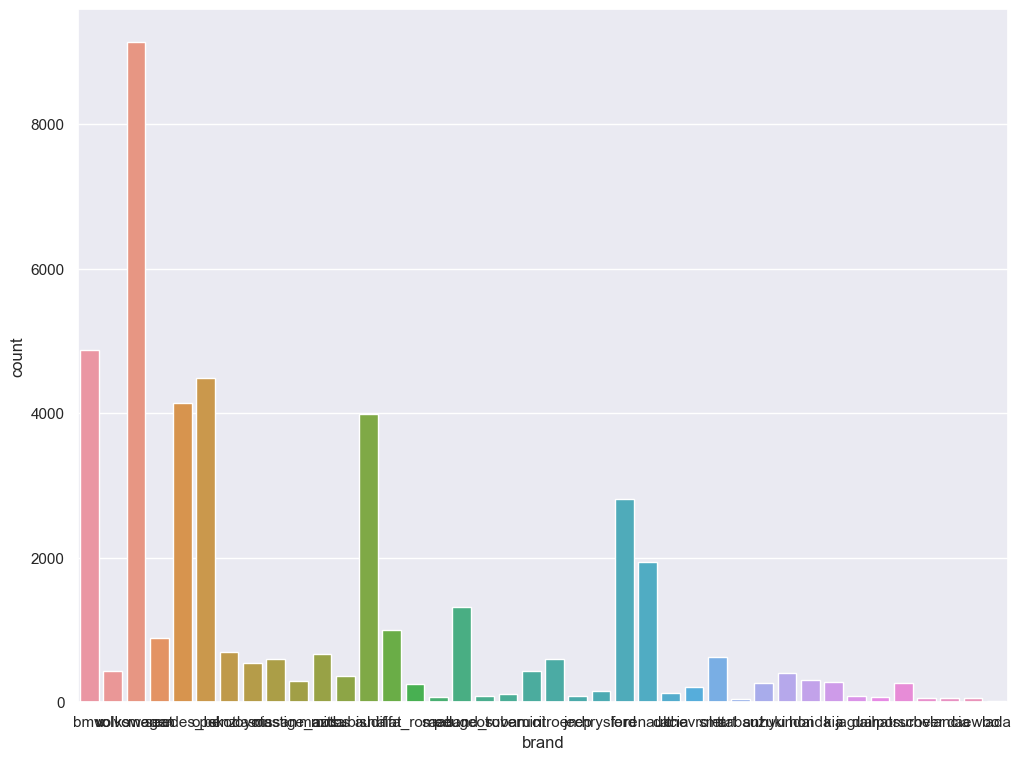

In [127]:
sns.countplot(x='brand',data=cars) 

<AxesSubplot: xlabel='brand', ylabel='price'>

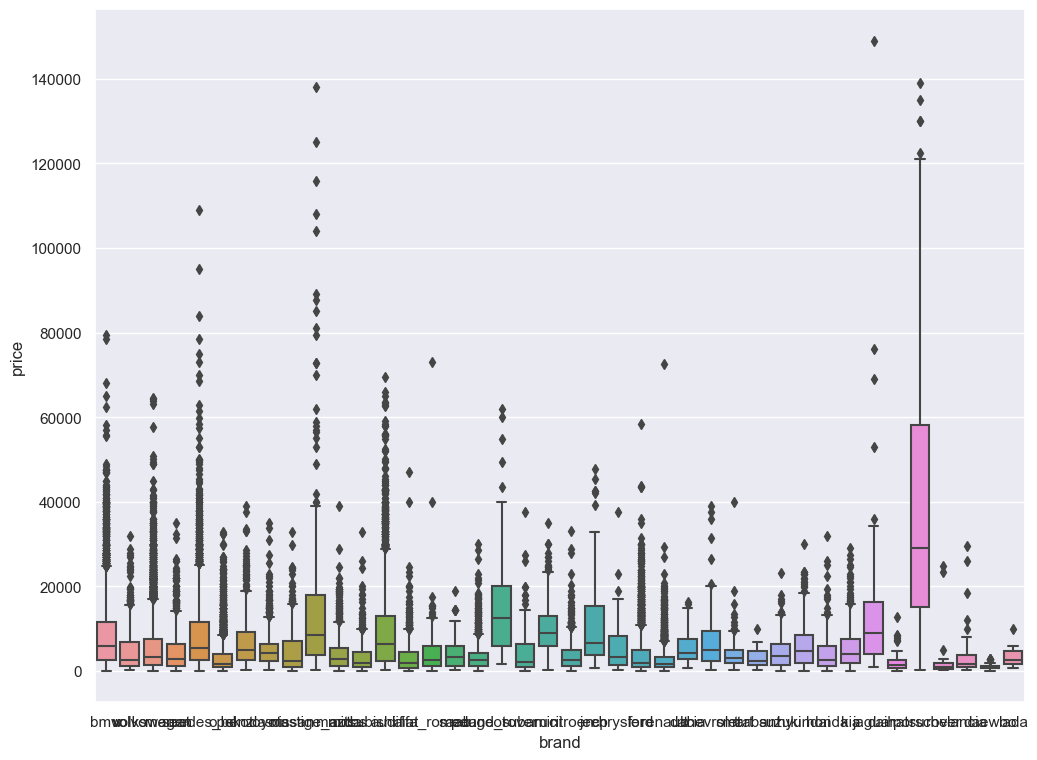

In [128]:
sns.boxplot(x='brand',y='price',data=cars)

In [129]:
cars.columns

Index(['seller', 'offerType', 'price', 'abtest', 'vehicleType', 'gearbox',
       'powerPS', 'model', 'kilometer', 'fuelType', 'brand',
       'notRepairedDamage', 'Age'],
      dtype='object')

In [130]:
cars=cars.drop(columns=['seller','offerType','abtest'])

In [131]:
cars.columns

Index(['price', 'vehicleType', 'gearbox', 'powerPS', 'model', 'kilometer',
       'fuelType', 'brand', 'notRepairedDamage', 'Age'],
      dtype='object')

In [132]:
#Now lets check the correlations between the varibles 
cars_1=cars.select_dtypes(exclude=[object])
correlation=cars_1.corr()
correlation
#hard to interpret which variable have high correlation value

,price,powerPS,kilometer,Age
price,1.000,0.575,-0.440,-0.336
powerPS,0.575,1.000,-0.016,-0.151
kilometer,-0.440,-0.016,1.000,0.292
Age,-0.336,-0.151,0.292,1.000


In [133]:
#therefore
cars_1.corr().loc[:,'price'].abs().sort_values(ascending=False)
#this method is to only check if there is any heay dependency of any of these variables
#except power ps other two not have heavyy influene on price
#though 0.57 is not to good but okk

price       1.000
powerPS     0.575
kilometer   0.440
Age         0.336
Name: price, dtype: float64

Cleaning data

In [134]:
cars.isnull().sum()

price                   0
vehicleType          2876
gearbox               794
powerPS                 0
model                1683
kilometer               0
fuelType             2597
brand                   0
notRepairedDamage    6277
Age                     0
dtype: int64

In [135]:
#dropping missing values

cars_missing_omitted=cars.dropna(axis=0 )
cars_missing_omitted.isnull().sum()

price                0
vehicleType          0
gearbox              0
powerPS              0
model                0
kilometer            0
fuelType             0
brand                0
notRepairedDamage    0
Age                  0
dtype: int64

In [136]:
cars_missing_omitted.columns
#now we have to convert categorical columns to numerical so that machine leaning algorithm can work on it

Index(['price', 'vehicleType', 'gearbox', 'powerPS', 'model', 'kilometer',
       'fuelType', 'brand', 'notRepairedDamage', 'Age'],
      dtype='object')

In [137]:
cars_missing_omitted=pd.get_dummies(cars_missing_omitted,drop_first=True)

In [138]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


In [139]:
cars_missing_omitted.columns


Index(['price', 'powerPS', 'kilometer', 'Age', 'vehicleType_cabrio',
       'vehicleType_coupe', 'vehicleType_limousine', 'vehicleType_others',
       'vehicleType_small car', 'vehicleType_station wagon',
       ...
       'brand_seat', 'brand_skoda', 'brand_smart', 'brand_subaru',
       'brand_suzuki', 'brand_toyota', 'brand_trabant', 'brand_volkswagen',
       'brand_volvo', 'notRepairedDamage_yes'],
      dtype='object', length=301)

In [140]:
#model building
x1=cars_missing_omitted.drop(['price'],axis='columns',inplace=False)
y1=cars_missing_omitted['price']
# print(y1.hist())
y1=np.log(y1)  #taking prices in log is better in order to get less skewness as seen in bth histogram
# print(y1.hist())
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.3,random_state=3)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(23018, 300) (9866, 300) (23018,) (9866,)


In [141]:
#Now we have to buid a baseline model for   this data aand i this predicted value is replaced with the mean value of the test data
#it is to set a bench mark for us and to comapre our model that we bulit in future 
#for this we are going to build random forest and in order to comare with tht model we also need a base value or the base metrics and
#base metric we are going to use is the rmse value for the base model 
# so base model id whre yu replace the redicted value as the mean from the test value  and ut it in plce of all values of y test data

base_pred=np.mean(y_test)
base_pred
base_pred=np.repeat(base_pred,len(y_test))
#rmse is root mean squared error .sqr root of the mean squared error .so compute the diff between the test value and the predicted value .squares them and
# divide them by the number of sample .will use rmse func with test data as input
base_rmse=np.sqrt(mean_squared_error(y_test,base_pred))

#so this  is  a bench mark for comparison any model we built using this should give us  value less than this .So that is the objective for us
print(base_rmse)

1.1274483657478247


In [142]:
linearreg=LinearRegression(fit_intercept=True)

In [143]:

linear_model1=linearreg.fit(x_train,y_train)

In [144]:
predct1=linearreg.predict(x_test)

In [145]:

#Computing MSE and RMSE again but instead of giving base value we will give here predicted value
lin_mse_1=mean_squared_error(y_test,predct1)
lin_rmse_1=np.sqrt(lin_mse_1)
print(lin_rmse_1) # here we have come down to 0.5 from 1.5 something

0.5455481266513846


In [146]:
#R Squared value -How good your model able to explain the variability in the Y
r2_test1=linear_model1.score(x_test,y_test)
r2_train1=linear_model1.score(x_train,y_train)

print(r2_test1,r2_train1)

0.7658615091649239 0.7800936978183916


count   9866.000
mean       0.003
std        0.546
min       -5.796
25%       -0.261
50%        0.041
75%        0.302
max        4.547
Name: price, dtype: float64

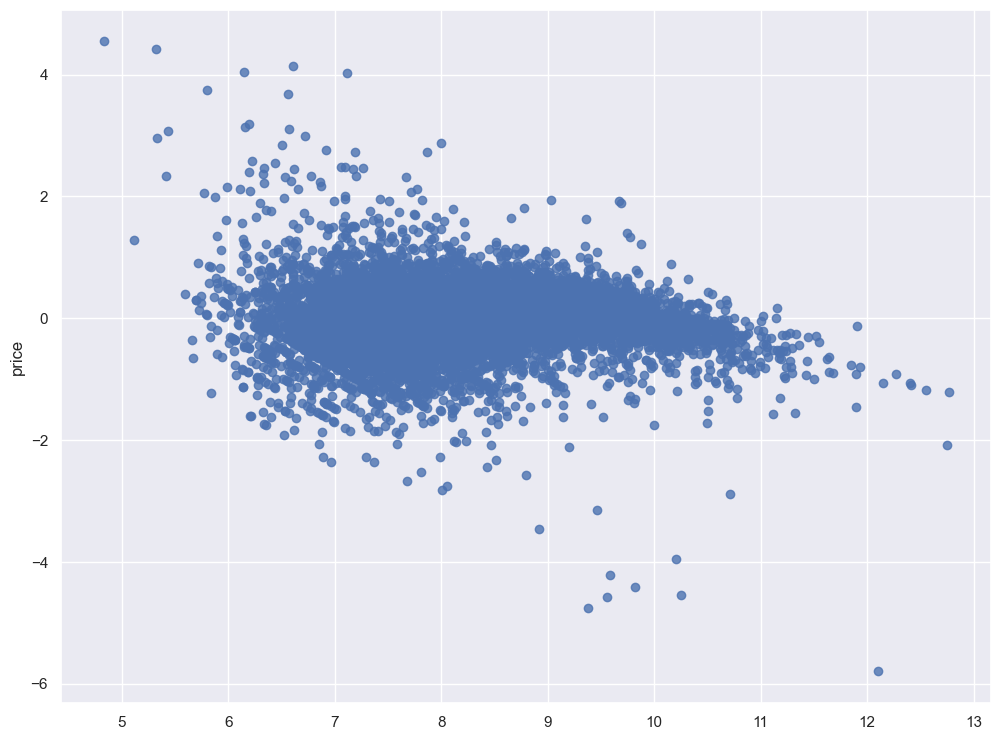

In [147]:
#Regression Diagnostic Residual Plot Analysis
#residual is just th difference between the test data and the prediction data
residuals1=y_test-predct1
sns.regplot(x=predct1 ,y=residuals1,scatter=True,fit_reg=False,data=cars)
residuals1.describe()
#the plot is good as residuals and the predicted values are close to zero which tells us that they are very close 
# to each other
#and as seen mean is also close to 0.003 which is a good indictor




Doing Random forest with ommited data

In [148]:
#Model parameters
rf=RandomForestRegressor(n_estimators=100, max_features='auto', max_depth=100, min_samples_split=10, min_samples_leaf=4, random_state=1)
#Model
model_rf1=rf.fit(x_train, y_train)
# Predicting model on test set
cars_predictions_rf1 = rf.predict(x_test)

c:\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


In [149]:
#Computing MSE and RMSE 
rf_mse1 =mean_squared_error(y_test, cars_predictions_rf1)
rf_rmse1= np.sqrt(rf_mse1) 
print(rf_rmse1)


0.436073731962631


In [150]:
#R squared value  
r2_rf_test1=model_rf1.score(x_test,y_test) 
r2_rf_train1=model_rf1.score(x_train,y_train) 
print(r2_rf_test1,r2_rf_train1)

0.8504017440877063 0.9202509898555229


In [152]:

cars_imputed =cars.apply(lambda x:x.fillna(x.median())\
                if x.dtypes=='float' else \
                x.fillna(x.value_counts().index[0]))
cars_imputed.isnull().sum()
# Converting categorical variables to dummy variables
cars_imputed=pd.get_dummies (cars_imputed, drop_first=True)

(29940, 303) (12832, 303) (29940,) (12832,)


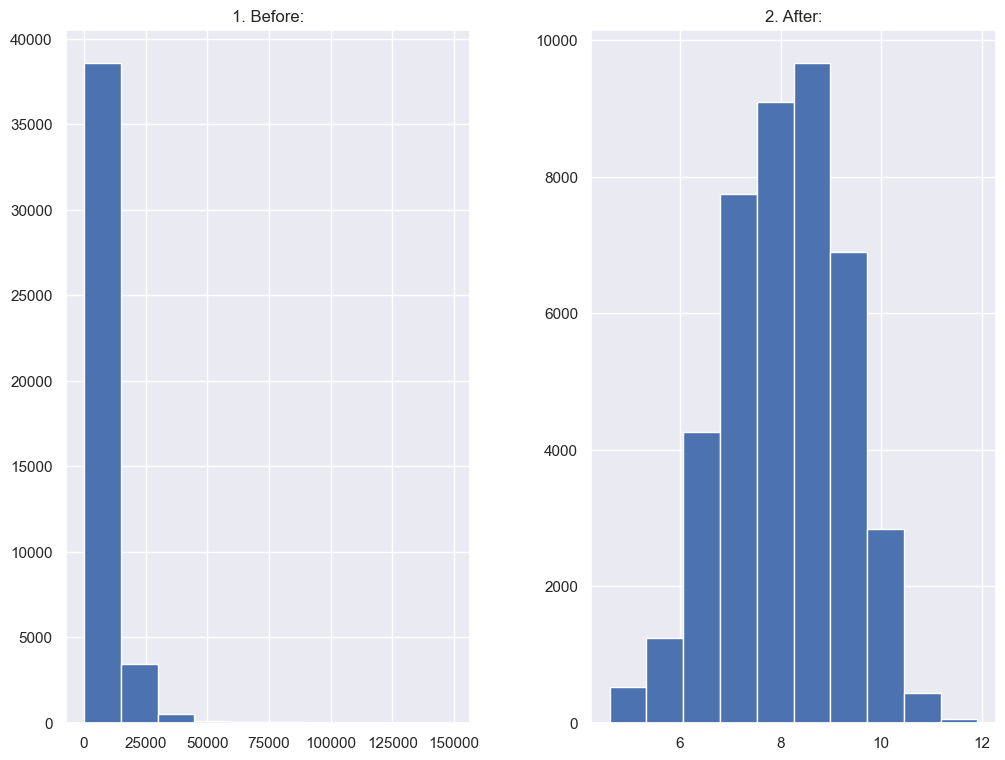

In [156]:
# MODEL BUILDING WITH IMPUTED DATA
# Separating input and output feature
x2=cars_imputed.drop(['price'], axis='columns', inplace=False)
y2=cars_imputed['price']

# Plotting the variable price 
prices =pd.DataFrame({"1. Before:" :y2, "2. After:" :np.log(y2)})
prices.hist()

# Transforming price as a logarithmic value 
y2=np.log(y2)

# Splitting data into test and train
x_train1, x_test1, y_train1, y_test1=train_test_split(x2, y2, test_size=0.3,random_state=3)
print(x_train1.shape, x_test1. shape, y_train1. shape, y_test1.shape)

In [159]:
# BASELINE MODEL FOR IMPUTED DATA
'''We are making a base model by using test data mean value This is to set a benchmark and to compare with our regression model
finding the mean for test data value '''
base_pred=np.mean(y_test1)

print(base_pred)
# Repeating same value till length of test data 
base_pred=np.repeat(base_pred,len(y_test1))
# finding the RMSE
base_root_mean_square_error_imputed=np.sqrt(mean_squared_error(y_test1,base_pred))
print(base_root_mean_square_error_imputed)

8.068391740519065
1.1884349112889792


In [160]:
# LINEAR REGRESSION WITH IMPUTED DATA
# Setting intercept as true 
lgr2=LinearRegression (fit_intercept=True)
# Model
model_lin2=lgr2.fit(x_train1,y_train1)
# Predicting model on test set
cars_predictions_lin2=lgr2.predict(x_test1)
# Computing MSE and RMSE
lin_mse2=mean_squared_error(y_test1, cars_predictions_lin2) 
lin_rmse2=np.sqrt(lin_mse2)
print(lin_rmse2)



0.6483956449231302


In [161]:
# RANDOM FOREST WITH IMPUTED DATA
# Model parameters
rf2=RandomForestRegressor(n_estimators=100, max_features='auto', max_depth=100,min_samples_split=10, min_samples_leaf=4, random_state=1)
# Model
model_rf2=rf2.fit(x_train1,y_train1)
# Predicting model on test set
cars_predictions_rf2=rf2.predict(x_test1)

c:\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


In [163]:
# Computing MSE and RMSE
rf_mse2=mean_squared_error(y_test1, cars_predictions_rf2) 
rf_rmse2=np.sqrt(rf_mse2)
print(rf_rmse2) 
#r squrd
r2_rf_test2=model_rf2.score(x_test1,y_test1) 
r2_rf_train2=model_rf2.score(x_train1,y_train1)
print(r2_rf_test2,r2_rf_train2)

0.49431395155050833
0.826996482130835 0.9024284642795107


In [167]:
# Final output
print("Metrics for models built from data where missing values were omitted")
print("R squared value for train from Linear Regression= %s"% r2_train1)
print("R squared value for test from Linear Regress  ion %s"% r2_test1)
print("R squared value for train from Random Forest %s"% r2_rf_train1)
print("R squared value for test from Random Forest %s"% r2_rf_test1) 
print("Base RMSE of model built from data where missing values were omitted %s"% base_rmse)
print("RMSE value for test from Linear Regression %s"% lin_rmse_1)
print("RMSE value for test from Random Forest» %s"% rf_rmse1)
print("\n\n")
print("Metrics for models built from data where missing values were imputed")
print("R squared value for train from Linear Regression %s"% r2_train1)
print("R squared value for test from Linear Regression %s"% r2_test1) 
print("R squared value for train from Random Forest %s"% r2_rf_train2)
print("R squared value for test from Random Forest %s"% r2_rf_test2) 
print("Base RMSE of model built from data where missing values were imputed %s"%base_root_mean_square_error_imputed)
print("RMSE value for test from Linear Regression %s"% lin_rmse2)
print("RMSE value for test from Random Forest= %s"% rf_rmse2)

Metrics for models built from data where missing values were omitted
R squared value for train from Linear Regression= 0.7800936978183916
R squared value for test from Linear Regress  ion 0.7658615091649239
R squared value for train from Random Forest 0.9202509898555229
R squared value for test from Random Forest 0.8504017440877063
Base RMSE of model built from data where missing values were omitted 1.1274483657478247
RMSE value for test from Linear Regression 0.5455481266513846
RMSE value for test from Random Forest» 0.436073731962631



Metrics for models built from data where missing values were imputed
R squared value for train from Linear Regression 0.7800936978183916
R squared value for test from Linear Regression 0.7658615091649239
R squared value for train from Random Forest 0.9024284642795107
R squared value for test from Random Forest 0.826996482130835
Base RMSE of model built from data where missing values were imputed 1.1884349112889792
RMSE value for test from Linear Regre